# 2. Disease prediction
I det här momentet kommer vi jobba med ett dataset med data för hjärt-kärlsjukdom. Börja med att ladda
ned datasetet från Kaggle och läs på vad de olika features betyder. Notera att detta dataset innehåller
många felaktigheter, exempelvis finns negativa blodtryck och blodtryck som är omöjligt höga.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data= pd.read_csv("../Disease-Prediction-Machine-Learning/data/cardio_train.csv",sep=";")
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


#### Features:

- id (int)
- Age in days (int) 
- Height in cm  (int) 
- Weight in kg  (float) 
- Gender : Men, Women
- ap_hi: Systolic blood pressure   (int)
- ap_lo: Diastolic blood pressure  (int) 
- Cholesterol - 1: normal, 2: above normal, 3: well above normal
- gluc: Glucose 1: normal, 2: above normal, 3: well above normal 
- smoke: Smoking - binary : 0: No, 1: yes
- alco: Alcohol intake - binary : 0: No, 1: yes
- active : Physical activity - binary : 0: No, 1: yes
- cardio: Presence or absence of cardiovascular disease - binary: 0: No, 1: yes

In [4]:
# Add 1 as women , 2 as men
data['gender'].replace({1:'Women', 2:'Men'}, inplace=True)

Data with column age represents in days so converting the entire columns in to years.

convert age column in days to years: years= (days / 365)

In [5]:
data['age']= round(data['age']/365) # to show round value
data['age'].head()

0    50.0
1    55.0
2    52.0
3    48.0
4    48.0
Name: age, dtype: float64

In [8]:
# create a copy for easy analysis
df = data.copy(deep=True)
df.head(3)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1


In [9]:
# replace all the colums 
#df['gender'].replace({1:'Women', 2:'Men'}, inplace=True)
df['cholesterol'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'},inplace=True)
df['gluc'].replace({1: 'normal', 2: 'above normal', 3: 'well above normal'},inplace=True)
df['smoke'].replace({0:'No',1:'Yes'},inplace=True)
df['alco'].replace({0:'No',1:'Yes'},inplace=True)
df['active'].replace({0:'No',1:'Yes'},inplace=True)
df['cardio'].replace({0:'No',1:'Yes'},inplace=True)


To analysis EDA ,replacing all the columns with their specific parameters for easy analysis. 

In [10]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,50.0,Men,168,62.0,110,80,normal,normal,No,No,Yes,No
1,1,55.0,Women,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes
2,2,52.0,Women,165,64.0,130,70,well above normal,normal,No,No,No,Yes
3,3,48.0,Men,169,82.0,150,100,normal,normal,No,No,Yes,Yes
4,4,48.0,Women,156,56.0,100,60,normal,normal,No,No,No,No


In [11]:
df.shape # rows: 70000, columns: 13

(70000, 13)

The data consists of 70000 patients with 13 features.

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           70000 non-null  int64  
 1   age          70000 non-null  float64
 2   gender       70000 non-null  object 
 3   height       70000 non-null  int64  
 4   weight       70000 non-null  float64
 5   ap_hi        70000 non-null  int64  
 6   ap_lo        70000 non-null  int64  
 7   cholesterol  70000 non-null  object 
 8   gluc         70000 non-null  object 
 9   smoke        70000 non-null  object 
 10  alco         70000 non-null  object 
 11  active       70000 non-null  object 
 12  cardio       70000 non-null  object 
dtypes: float64(2), int64(4), object(7)
memory usage: 6.9+ MB


In [13]:
df.isnull().sum() # no missing values

id             0
age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [14]:
# Dropping id column - not requires it just shows the count of patients
df = df.drop('id', axis=1)
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,50.0,Men,168,62.0,110,80,normal,normal,No,No,Yes,No
1,55.0,Women,156,85.0,140,90,well above normal,normal,No,No,Yes,Yes
2,52.0,Women,165,64.0,130,70,well above normal,normal,No,No,No,Yes
3,48.0,Men,169,82.0,150,100,normal,normal,No,No,Yes,Yes
4,48.0,Women,156,56.0,100,60,normal,normal,No,No,No,No


In [15]:
# Statstical analysis of the data
df.describe().T


,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.338686,6.765294,30.0,48.0,54.0,58.0,65.0
height,70000.0,164.359229,8.210126,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.205690,14.395757,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.817286,154.011419,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.630414,188.472530,-70.0,80.0,80.0,90.0,11000.0


The data contains inaccuracies as negatives values in column ap_hi and ap_lo which are highly impossible.

In [17]:
df.describe().apply(lambda x: x.apply('{0:.1f}'.format)).T # set a fortmat to look and understand easily

,count,mean,std,min,25%,50%,75%,max
age,70000.0,53.3,6.8,30.0,48.0,54.0,58.0,65.0
height,70000.0,164.4,8.2,55.0,159.0,165.0,170.0,250.0
weight,70000.0,74.2,14.4,10.0,65.0,72.0,82.0,200.0
ap_hi,70000.0,128.8,154.0,-150.0,120.0,120.0,140.0,16020.0
ap_lo,70000.0,96.6,188.5,-70.0,80.0,80.0,90.0,11000.0


### a) Hur många är positiva för hjärt-kärlsjukdom och hur många är negativa?

In [18]:
disease_count = df['cardio'].value_counts()
print('Positive and Negative cardio casess are: ')
disease_count

Positive and Negative cardio casess are: 


No     35021
Yes    34979
Name: cardio, dtype: int64

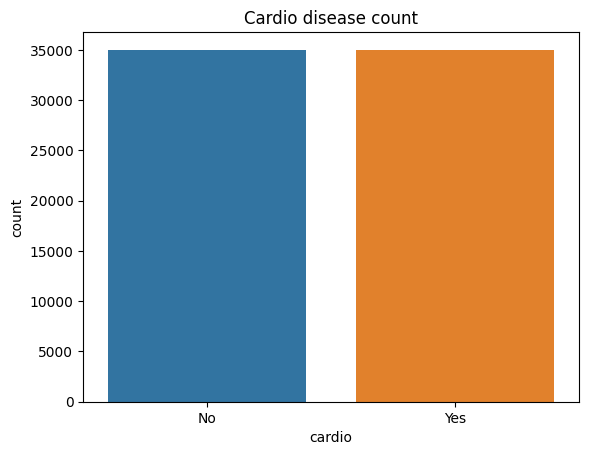

In [24]:
sns.countplot(x='cardio', data=df)
plt.title('Cardio disease count')
plt.show()

### b) Hur stor andel har normala, över normala och långt över normala kolesterolvärden? Rita ett tårtdiagram.

In [25]:
cholestrol = df['cholesterol'].value_counts()
cholestrol

normal               52385
above normal          9549
well above normal     8066
Name: cholesterol, dtype: int64

##### percentage = count of individual / total count

In [26]:
df.shape[0] # total number of persons

70000

In [27]:
percentage_of_cholestrol= (cholestrol/df.shape[0])*100
percentage_of_cholestrol


normal               74.835714
above normal         13.641429
well above normal    11.522857
Name: cholesterol, dtype: float64

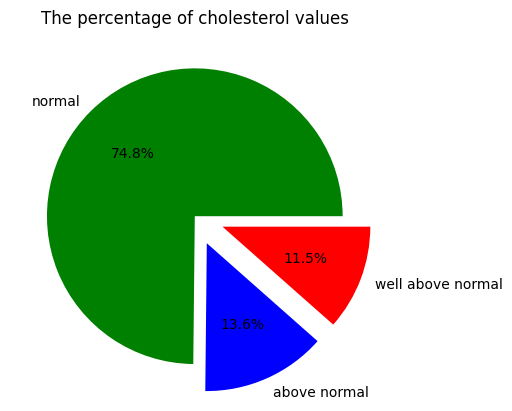

In [40]:
plt.pie(cholestrol.values, labels = cholestrol.index, autopct='%.1f%%',explode= (0,0.2,0.2), colors=['green','blue','red'])
plt.title('The percentage of cholesterol values')
plt.show()

### c) Hur ser åldersfördelningen ut? Rita ett histogram.

In [42]:
df['age'].unique()

array([50., 55., 52., 48., 60., 61., 62., 54., 41., 40., 46., 58., 59.,
       63., 64., 57., 56., 49., 51., 44., 65., 45., 53., 47., 42., 39.,
       43., 30.])

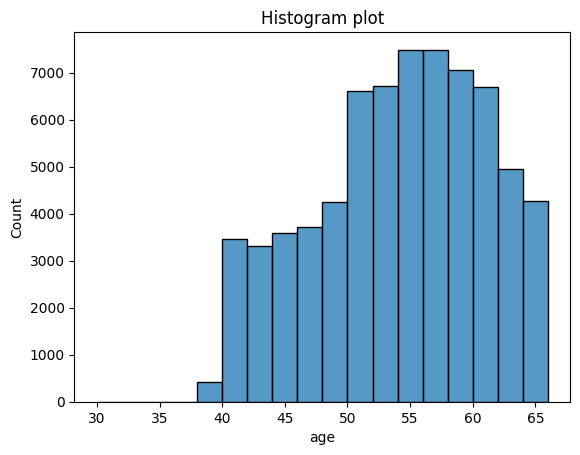

In [53]:
sns.histplot(data=df, x="age",binwidth=2)
plt.title('Histogram plot')
plt.show()

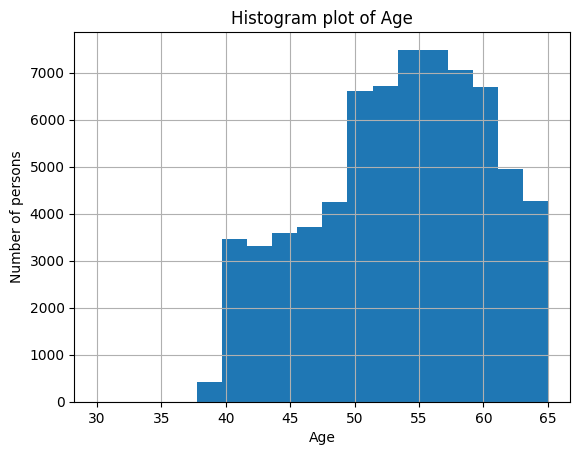

In [54]:
df['age'].hist(bins=18)
plt.xlabel('Age')
plt.ylabel('Number of persons')
plt.title('Histogram plot of Age')
plt.show()

### d) Hur stor andel röker?

In [55]:
smoking_counts= df['smoke'].value_counts()
smoking_counts

No     63831
Yes     6169
Name: smoke, dtype: int64

In [56]:
percentage_of_smoking= smoking_counts/df.shape[0]
percentage_of_smoking

No     0.911871
Yes    0.088129
Name: smoke, dtype: float64

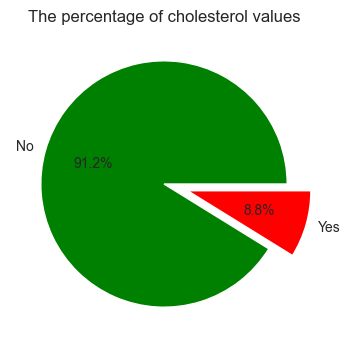

In [117]:
fig, ax = plt.subplots(figsize=(18,4))
ax.pie(smoking_counts.values, labels = smoking_counts.index, autopct='%.1f%%',explode= (0,0.2), colors=['green','red'])
plt.title('The percentage of cholesterol values')
plt.show()

In [118]:
# patients who got cardio disease
df_stroke_yes= df.query('cardio== "Yes"')
smoke_y= (df_stroke_yes['smoke'].value_counts())/df_stroke_yes.shape[0]
# patients are not get cardio
df_stroke_no= df.query('cardio== "No"')
smoke_n= (df_stroke_no['smoke'].value_counts()/df_stroke_no.shape[0])
smoke_y,smoke_n


(No     0.916264
 Yes    0.083736
 Name: smoke, dtype: float64,
 No     0.907484
 Yes    0.092516
 Name: smoke, dtype: float64)

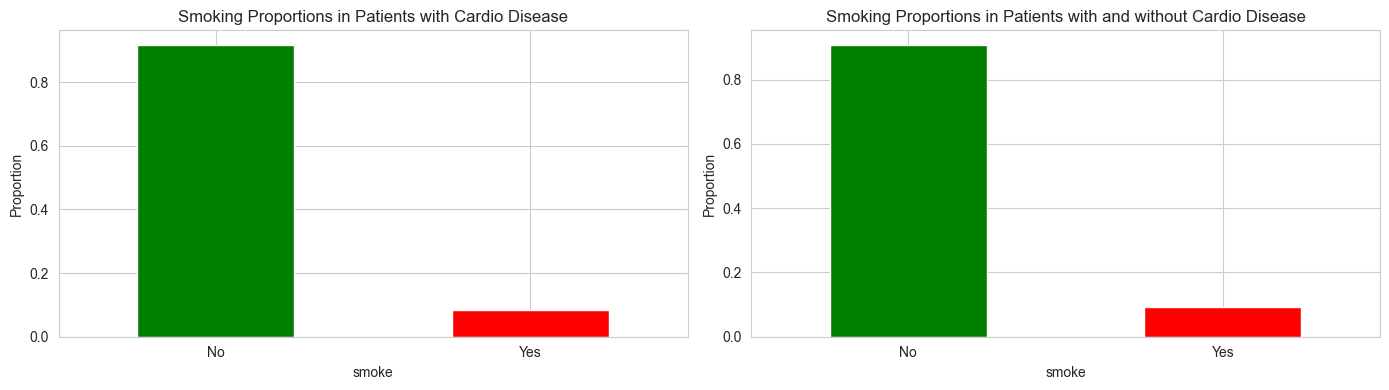

In [176]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
smoke_y.plot(kind='bar',rot = 0,color=['green','red'],ax= ax[0],xlabel='smoke',ylabel='Proportion')
smoke_n.plot(kind='bar',rot = 0,color=['green','red'],ax= ax[1],xlabel='smoke',ylabel='Proportion')
ax[0].set_title('Smoking Proportions in Patients with Cardio Disease')
ax[1].set_title('Smoking Proportions in Patients with and without Cardio Disease')
fig.tight_layout()
plt.show()


### e) Hur ser viktfördelningen ut? Rita lämpligt diagram.

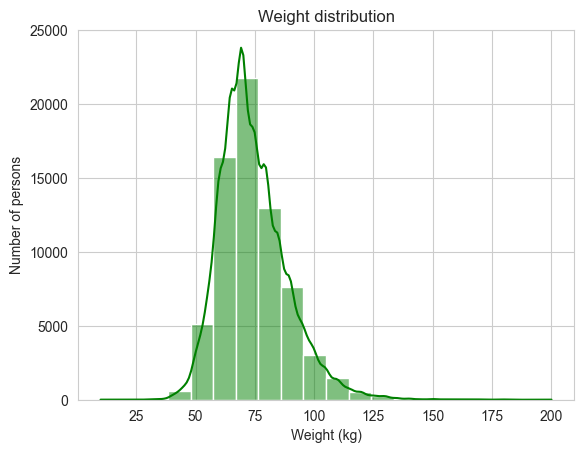

In [131]:
sns.histplot(df['weight'], bins=20, kde= True, color='g')
plt.xlabel('Weight (kg)')
plt.ylabel('Number of persons')
plt.title('Weight distribution')
plt.show()

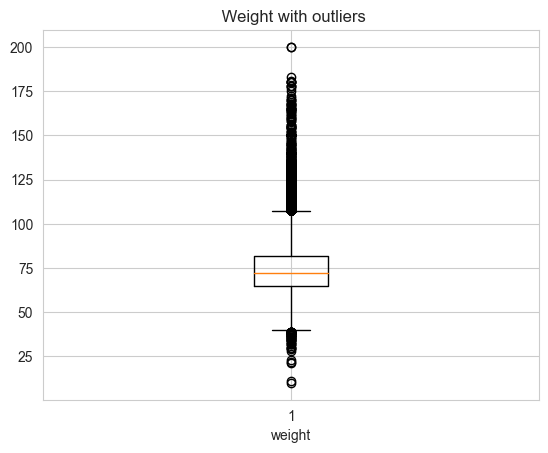

In [135]:
plt.boxplot(df['weight'])
plt.title(' Weight with outliers') 
plt.xlabel('weight')
plt.show()

### f) Hur ser längdfördelningen ut? Rita lämpligt diagram

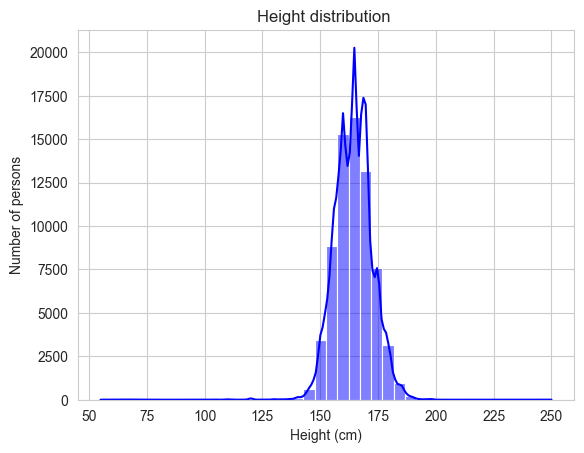

In [137]:
sns.histplot(df['height'], bins=40, kde= True, color='blue')
plt.xlabel('Height (cm)')
plt.ylabel('Number of persons')
plt.title('Height distribution ')
plt.show()

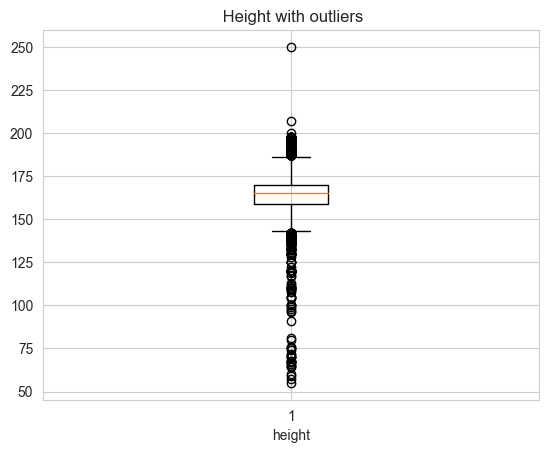

In [138]:
plt.boxplot(df['height'])
plt.title(' Height with outliers') # below 150 and above 185 outliers are present
plt.xlabel('height')
plt.show()

### g) Hur stor andel av kvinnor respektive män har hjärt-kärlsjukdom? Rita lämpligt diagram

In [140]:
df_stroke= df.query('cardio== "Yes"')
gender_count=df_stroke['gender'].value_counts()
proportion_of_gender= gender_count/df_stroke.shape[0]
proportion_of_gender

Women    0.646559
Men      0.353441
Name: gender, dtype: float64

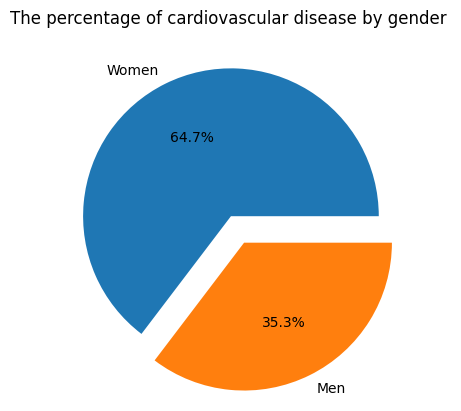

In [27]:
plt.pie(proportion_of_gender.values, labels = proportion_of_gender.index, autopct='%1.1f%%',explode= (0,0.2))
plt.title('The percentage of cardiovascular disease by gender ')
plt.show()

In [156]:
df_women= df.query('gender == "Women"')
df_men= df.query('gender == "Men"')
df_cardio_w= df_women['cardio'].value_counts()
df_cardio_m =df_men['cardio'].value_counts()
df_cardio_m,df_cardio_w

(Yes    12363
 No     12107
 Name: cardio, dtype: int64,
 No     22914
 Yes    22616
 Name: cardio, dtype: int64)

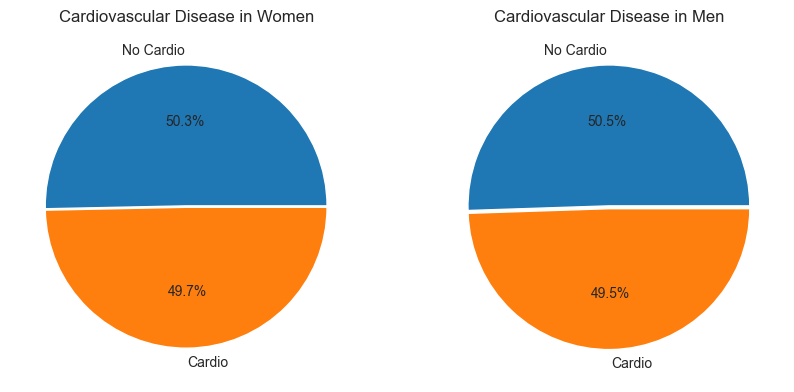

In [174]:

fig, ax = plt.subplots(1, 2, figsize=(10, 5))

# Create pie chart for women
ax[0].pie(df_cardio_w, labels=['No Cardio', 'Cardio'], autopct='%1.1f%%',explode= (0,0.01))
ax[0].set_title('Cardiovascular Disease in Women')

# Create pie chart for men
ax[1].pie(df_cardio_m, labels=['No Cardio', 'Cardio'],autopct='%1.1f%%',explode= (0,0.02))
ax[1].set_title('Cardiovascular Disease in Men')

# Display the plot
plt.show()


# 2.1.0 - Feature engineering BMI
Skapa en feature för BMI (Body Mass Index), läs på om formeln på wikipedia.


Body mass index (BMI): 
 - BMI = weight / height^2, where weight is in kilograms and height is in meters. 

Data frame weight in kg and height in cm, so we can covert to meters by 1m = 100 cm

In [175]:
# calculate BMI of each person in  tha data
data['BMI'] = data['weight']/(data['height']/100)**2
data['BMI']= round(data['BMI'],1)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0


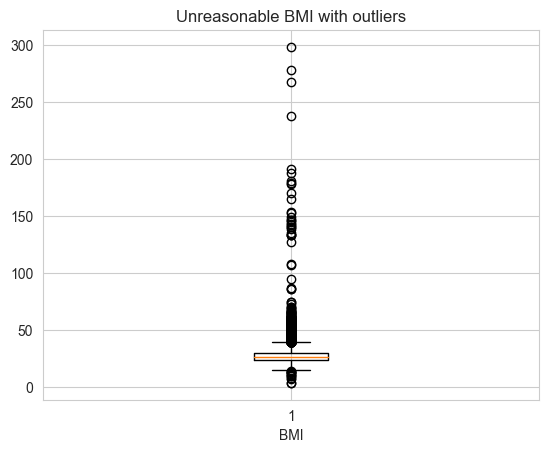

In [177]:
# box plot to show outliers
plt.boxplot(data['BMI']);
plt.title('Unreasonable BMI with outliers')
plt.xlabel('BMI')
plt.show()

##### a) Släng de samples med orimliga BMIer och outliers. Notera att detta kan vara svårt att avgöra i vilket range av BMIer som vi ska spara. Beskriv hur du kommer fram till gränserna.


- The WHO defines a healthy BMI range as between 18.5 and 24.9 kg/m^2.So any BMI values outside of this range can be considered as unreasonable and should be removed from the dataset.

- We should identify outliers using a method such as the Tukey method, which defines outliers as values that are more than 1.5 times the interquartile range (IQR) below the first quartile or above the third quartile.

  Now remove the outliers in data.  # from exercise 4: 0(f)
  - Lower bound outlier: $Q_1 - 1.5\cdot IQR$
  - Upper bound outlier: $Q_3 + 1.5\cdot IQR$

  where $Q_1$ is the 1st quartile or 25 percentile, $Q_3$ is the 3rd quartile or 75 percentile and $IQR = Q_3-Q_1$ is the interquartile range. 

In [178]:
#min_BMI = 18.5 and max_BMI= 24.9 - Normal range

# Reasonable BMI must be in range
reasonable_BMI = data.query('BMI >= 18.5 & BMI <= 24.9')
reasonable_BMI['BMI'].unique() # In range

array([22. , 23.5, 23. , 20. , 20.8, 21.3, 18.5, 24.2, 24. , 24.9, 23.7,
       20.7, 21.5, 23.6, 21.1, 24.4, 22.9, 23.9, 23.8, 19.4, 22.6, 21.2,
       20.9, 22.3, 20.1, 22.8, 22.5, 21.4, 24.7, 20.2, 20.3, 23.4, 22.4,
       21.6, 23.2, 19.3, 24.6, 18.6, 24.3, 21. , 24.1, 24.5, 20.5, 22.7,
       21.7, 24.8, 20.4, 19. , 21.8, 21.9, 23.1, 18.7, 23.3, 22.1, 19.2,
       22.2, 19.6, 18.9, 20.6, 19.5, 19.1, 19.8, 19.7, 19.9, 18.8])

In [179]:
#  using Tukey method dentify  outliers
Q1 = reasonable_BMI['BMI'].quantile(0.25)
Q3 = reasonable_BMI['BMI'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = (reasonable_BMI['BMI'] < lower_bound) | (reasonable_BMI['BMI'] > upper_bound)

# removie outliers from reasonable data
df_cleaned = reasonable_BMI[~outliers]
df_cleaned.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0
11,16,52.0,Men,173,60.0,120,80,1,1,0,0,1,0,20.0
12,18,41.0,Men,165,60.0,120,80,1,1,0,0,0,0,22.0


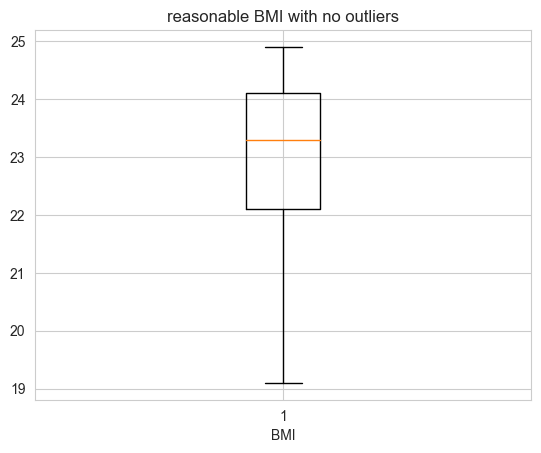

In [180]:
# plot after remove outliers
plt.boxplot(df_cleaned['BMI']); 
plt.title('reasonable BMI with no outliers')
plt.xlabel('BMI')
plt.show()

##### b) Skapa en kategorisk BMI-feature med kategorierna: normal range, overweight, obese (class I), obese(class II), obese (class III).

To create a categorical BMI feature with the categories: underweight,normal range, overweight, obese (class I), obese (class II), and obese (class III)  
###### https://en.wikipedia.org/wiki/Body_mass_index

- underweight: BMI < 18.5 kg/m^2 
- normal weight: 18.5 kg/m^2 ≤ BMI ≤ 24.9 kg/m^2
- overweight: 25 kg/m^2 ≤ BMI ≤ 29.9 kg/m^2
- obesity class I: 30 kg/m^2 ≤ BMI ≤ 34.9 kg/m^2 
- obesity class II: 35 kg/m^2 ≤ BMI ≤ 39.9 kg/m^2 
- obesity class III. BMI ≥ 40 kg/m^2 

In [181]:
 # function define categorical BMI
def categorical_BMI(BMI):
    if BMI < 18.5:
        return 'underweight'
    elif 18.5 <= BMI <= 24.9:
        return 'normal range'
    elif 25 <= BMI <= 29.9:
        return 'overweight'
    elif 30 <= BMI <= 34.9:
        return 'obese (class I)'
    elif 35 <= BMI <= 39.9:
        return 'obese (class II)'
    else:
        return 'obese (class III)'
    
data['BMI_category'] = data['BMI'].apply(categorical_BMI)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9,obese (class I)
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5,normal range
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7,overweight
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range


# 2.1.1 - Feature engineering blodtryck
Släng bort samples med orimliga blodtryck och outliers. Likt uppgift 2.1.0 är det inte trivialt att sätta
gränserna. Skapa en feature för blodtryckskategorier enligt tabellen i denna artikel. Beskriv hur du kommer
fram till gränserna.

In [182]:
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9,obese (class I)
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5,normal range
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7,overweight
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range


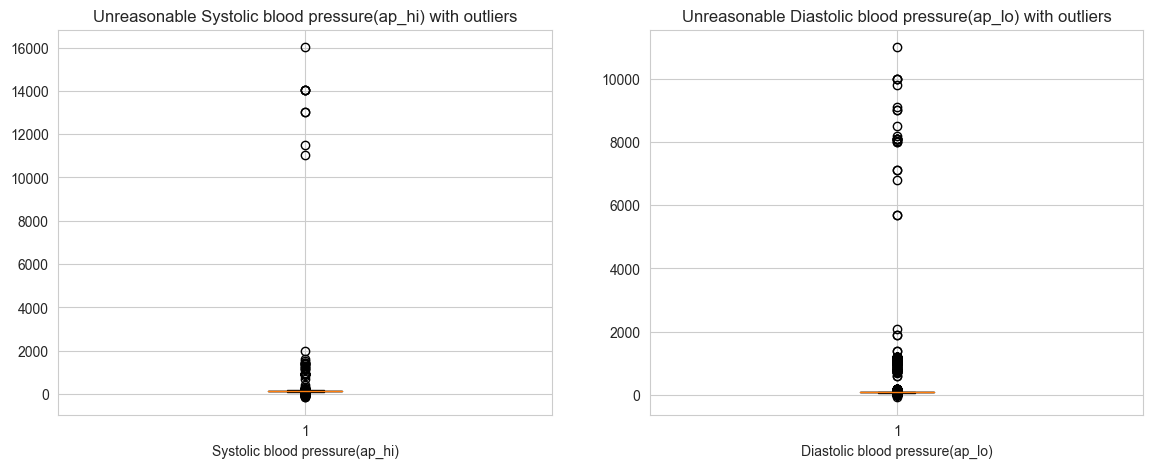

In [184]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

# box plot for systolic bp
ax[0].boxplot(data['ap_hi'])
ax[0].set_title('Unreasonable Systolic blood pressure(ap_hi) with outliers')
ax[0].set_xlabel('Systolic blood pressure(ap_hi)')

# box plot for diastolic bp
ax[1].boxplot(data['ap_lo'])
ax[1].set_title('Unreasonable Diastolic blood pressure(ap_lo) with outliers')
ax[1].set_xlabel('Diastolic blood pressure(ap_lo)')

plt.show()


##### Blood Pressure:https://en.wikipedia.org/wiki/Blood_pressure

Blood pressure is the force that the blood exerts on the walls of the arteries as it flows through them. It is typically measured in millimeters of mercury (mmHg) and consists of two values: systolic blood pressure (the pressure in the arteries when the heart beats) and diastolic blood pressure (the pressure in the arteries when the heart is resting between beats).




In [185]:
data.head(1)

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range


In [191]:
# To filter out the negative blood pressure value
data = data.query('ap_hi > 0 & ap_lo > 0')
data.shape

(69971, 15)

In [236]:

#ap_hi_max = 220,  ap_hi_min= 90:Systolic BP
# ap_lo_max= 100, ap_lo_min= 40: Diastolic BP

 
# Reasonable ap_hi_max must be in range
reasonable_ap_hi = data.query('ap_hi >= 90 & ap_hi < 220')
print('Systolic BP (ap_hi):',reasonable_ap_hi['ap_hi'].unique()) # In range: 90-220

# Reasonable ap_lo_max must be in range
reasonable_ap_lo = data.query('ap_lo >= 40 & ap_lo <= 100')
print('Diastolic BP (ap_lo):',reasonable_ap_lo['ap_lo'].unique()) # In range: 40-100

Systolic BP (ap_hi): [110 140 130 150 100 120 145 170 135 125  90 180 160 133 190 122 169 126
 158 200 123 161 147 115 137 153 148 105 119 141 165 164 124 172 162 117
 134 166 210 176 116 121 112 159 113 118 155 142 131 157 136 146 138 109
 106 129  93  95 179 156 168 132 104 103 178 175 128 151 139 127 108 144
 102 143 107 184 149 167 114 101 181 171 202 111 188 185 163 173 154 177
 174 191 197 152  96 199 193  99 196 207 215  97 195 187]
Diastolic BP (ap_lo): [ 80  90  70 100  60  85  89  65  63  79  50  84  91  40  73  78  75  86
  87  82  95  69  74  97  81  83  93  99  77  59  92  68  61  94  66  52
  76  62  96  67  88  71  72  98  57  64  45  58  53  56  55  54  49]


In [237]:
#  using Tukey method dentify  outliers

# Systolic Blood Pressure
SBP_Q1 = reasonable_ap_hi['ap_hi'].quantile(0.25)
SBP_Q3 = reasonable_ap_hi['ap_hi'].quantile(0.75)
SBP_IQR = SBP_Q3 - SBP_Q1
ap_hi_lower_bound = SBP_Q1 - 1.5 * SBP_IQR
ap_hi_upper_bound = SBP_Q3 + 1.5 * SBP_IQR
outliers_SBP = (reasonable_ap_hi['ap_hi'] < ap_hi_lower_bound) | (reasonable_ap_hi['ap_hi'] > ap_hi_upper_bound)

# Diastolic Blood Pressure
DBP_Q1 = reasonable_ap_lo['ap_lo'].quantile(0.25)
DBP_Q3 = reasonable_ap_lo['ap_lo'].quantile(0.75)
DBP_IQR = DBP_Q3 - DBP_Q1
ap_lo_lower_bound = DBP_Q1 - 1.5 * DBP_IQR
ap_lo_upper_bound = DBP_Q3 + 1.5 * DBP_IQR
outliers_DBP = (reasonable_ap_lo['ap_lo'] < ap_lo_lower_bound) | (reasonable_ap_lo['ap_lo'] > ap_lo_upper_bound)


# removie outliers from reasonable data
df_cleaned_SBP = reasonable_ap_hi[~outliers_SBP]
df_cleaned_DBP = reasonable_ap_lo[~outliers_DBP]
df_cleaned_DBP.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9,obese (class I)
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5,normal range
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7,overweight
5,8,60.0,Women,151,67.0,120,80,2,2,0,0,0,0,29.4,overweight


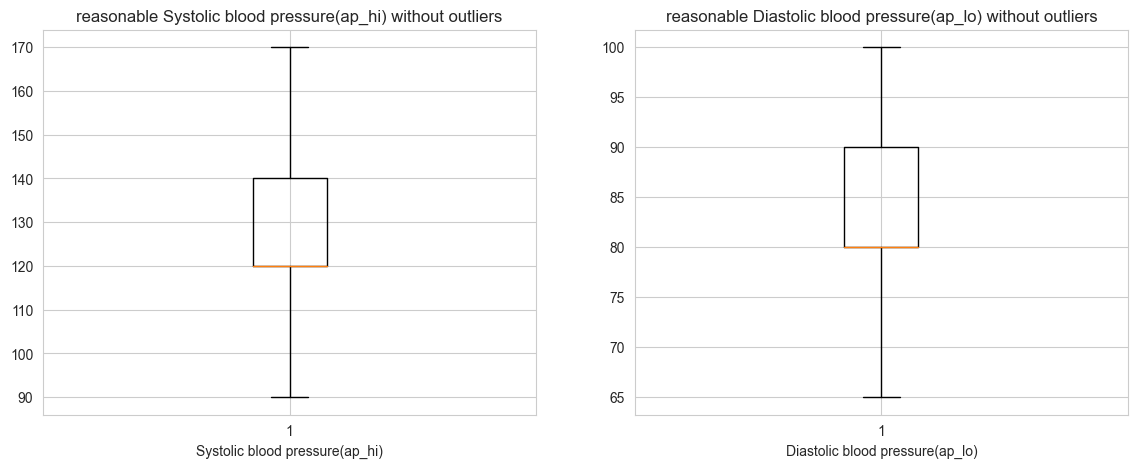

In [238]:
fig, ax = plt.subplots(1, 2, figsize=(14, 5))

ax[0].boxplot(df_cleaned_SBP['ap_hi'])
ax[0].set_title('reasonable Systolic blood pressure(ap_hi) without outliers')
ax[0].set_xlabel('Systolic blood pressure(ap_hi)')

ax[1].boxplot(df_cleaned_DBP['ap_lo'])
ax[1].set_title('reasonable Diastolic blood pressure(ap_lo) without outliers')
ax[1].set_xlabel('Diastolic blood pressure(ap_lo)')

plt.show()


- The systolic blood pressure (ap_hi) and diastolic blood pressure (ap_lo) has negative values in data which are not possible for blood pressure. so we to want filter out the values which are less than or equal to zero.

- For reasonable ap_hi and ap_lo values, we filter the data by using the range of blood pressure values as ap_hi_max = 220,  ap_hi_min= 90, ap_lo_max= 100, ap_lo_min= 40.

- By using Tukey method we then calculate the first and third quartiles of this data to determine interquartile range and define lower and upper bounds of systolic and diastolic bp.So any values that are outside of this range cosidered as outliers and removes from the data.

- We then plot boxplots with cleaned outliers of both systolic and diastolic blood pressure for reasonable values.

https://www.heart.org/en/health-topics/high-blood-pressure/understanding-blood-pressure-readings
To create a categorical Blood pressure feature with the categories:
- Normal                 : SBP < 120 and DBP < 80
- Elevated               : 120 ≤ SBP ≤ 129 mm Hg and  DBP < 80 mm Hg
- stage1 hypertension    : 130 ≤ SBP ≤ 139 mm Hg  or  80 ≤ DBP ≤ 89 mm Hg
- stage2 hypertension    : SBP ≥ 140 mm Hg or  DBP ≥ 90 mm Hg
- hypertension crisis	: SBP > 180 mm Hg or DBP > 120 mm Hg



In [239]:
def categorical_BP(ap_hi,ap_lo):
    if ap_hi < 120 and ap_lo < 80:
        return 'normal'
    elif 120 <= ap_hi <= 129 and ap_lo < 80:
        return 'elevated'
    elif 130 <= ap_hi <= 139 or 80 <= ap_lo <= 89:
        return 'hypertension stage I' 
    elif  ap_hi >= 140 or ap_lo >= 90:
        return 'hypertension stage II' 
    elif ap_hi > 180 or ap_lo > 120:
        return 'hypertension crisis'
    
data['BP_category'] =  data.apply(lambda x: categorical_BP(x['ap_hi'], x['ap_lo']), axis=1)
data.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category,BP_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range,hypertension stage I
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9,obese (class I),hypertension stage II
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5,normal range,hypertension stage I
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7,overweight,hypertension stage II
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range,normal


# 2.2.0 - Visualiseringar andel sjukdomar
Skapa barplots med en feature mot andelen positiva för hjärt-kärl sjukdom. Exempelvis blodtryckskategorier
mot andel positiva, BMI kategori mot andel positiva mm. Gör dessa plots i en figur med flera subplots.


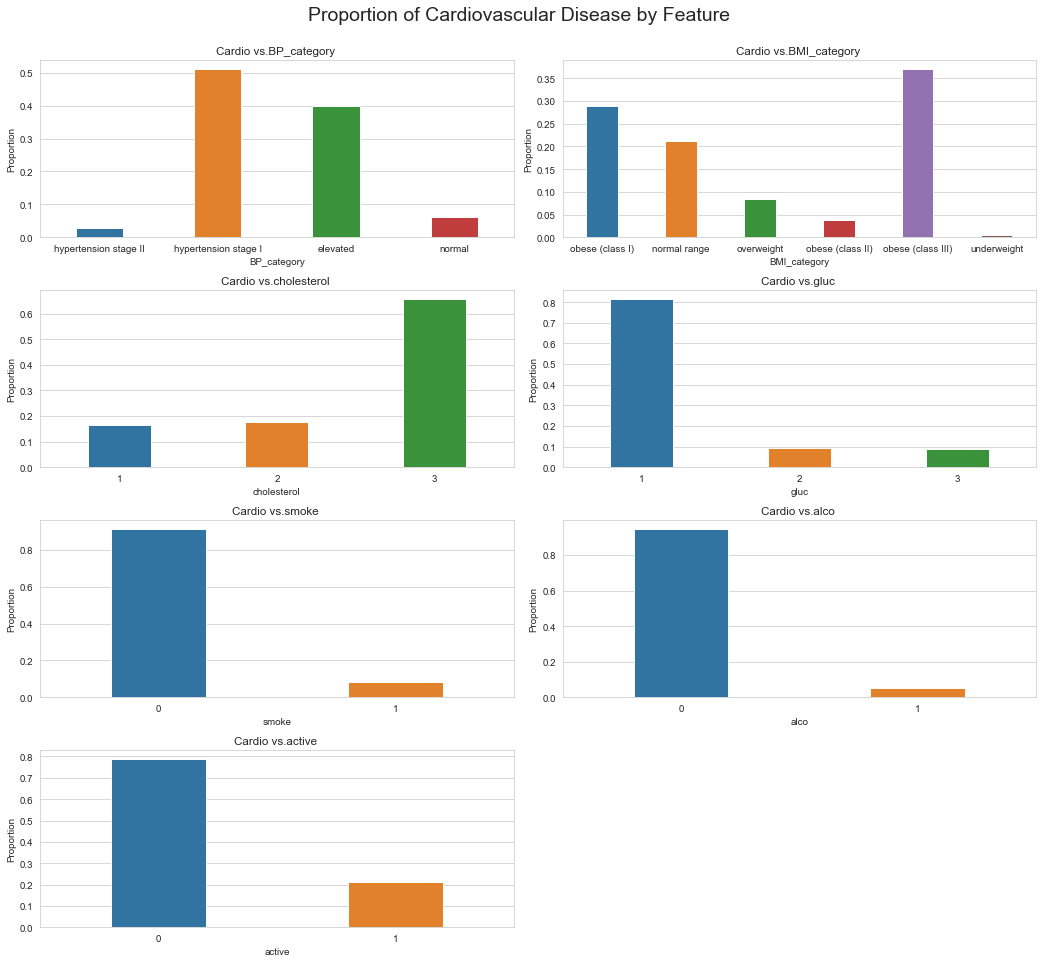

In [252]:
# data with cardio
df_cardio = data.query("cardio== 1")
cardio = [
    "BP_category",
    "BMI_category",
    "cholesterol",
    "gluc",
    "smoke",
    "alco",
    "active",
]
fig = plt.figure(figsize=(15, 14), dpi=70)  # shows the figure size
fig.suptitle("Proportion of Cardiovascular Disease by Feature \n ", fontsize=20)
for i, col in enumerate(cardio):

    ax = plt.subplot(4, 2, i + 1)  # represents subplots two row with four column
    sns.barplot(
        x=df_cardio[col].unique(),
        y=(df_cardio.groupby(by=col)["cardio"].value_counts()) / df_cardio.shape[0],
        width=0.4
    )
    ax.set_xlabel(col)
    ax.set_ylabel("Proportion")
    ax.set_title(f"Cardio vs.{col} ")
    #ax.legend()
fig.tight_layout()
plt.show()


# 2.2.1 - Visualiseringar korrelation
Skapa en heatmap av korrelationer och se om du hittar features som är starkt korrelerade, dvs nära 1 eller
features som är starkt negativt korrelerade, dvs nära -1. Kan du förklara varför de kan vara korrelerade?


In [253]:
data.corr(numeric_only=True).head()

,id,age,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
id,1.000000,0.002984,-0.003051,-0.001822,0.003302,-0.002500,0.006170,0.002394,-0.003708,0.001234,0.003742,0.003807,-0.001344
age,0.002984,1.000000,-0.081613,0.053605,0.020962,0.017763,0.154536,0.098542,-0.047999,-0.030036,-0.009894,0.237760,0.085440
height,-0.003051,-0.081613,1.000000,0.290925,0.005477,0.006154,-0.050213,-0.018677,0.187946,0.094322,-0.006649,-0.010912,-0.290454
weight,-0.001822,0.053605,0.290925,1.000000,0.031056,0.043650,0.141806,0.106735,0.067770,0.067099,-0.016891,0.181594,0.762094
ap_hi,0.003302,0.020962,0.005477,0.031056,1.000000,0.016297,0.023901,0.011957,-0.000853,0.001465,-0.000274,0.054821,0.025189


In [43]:
data.columns

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio', 'BMI',
       'BMI_category', 'BP_category'],
      dtype='object')

<Axes: >

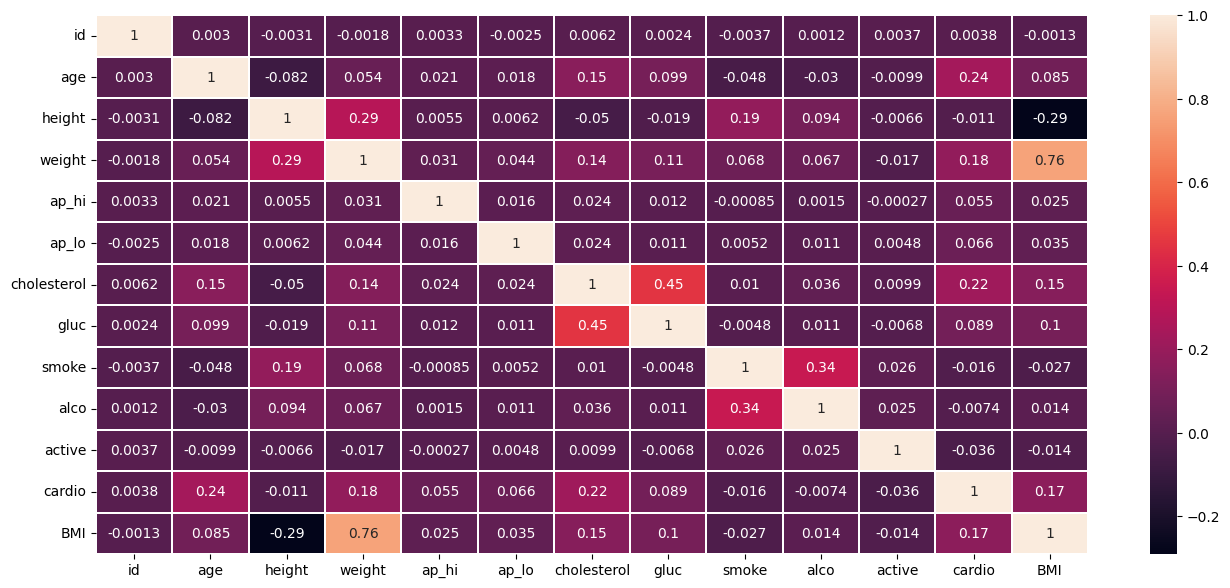

In [44]:
fig = plt.figure(figsize=(16,7))
sns.heatmap(data.corr(numeric_only=True), annot=True, linewidths='.2')

From this heatmap, we can see that there are several features that are strongly correlated with each other.

- Age is negatively correlated with active, as people age increases they become less active.
- BMI is positively related with age and weight.The people gain their weight as they age.
- Smoke is negatively correlated to age and cardio.Smoking is a risk factor for cardio and increases more risk with age.
- Glucose and Cholesterol levels are  positively correlated with BMI.
- Systiloc BP is positively correlated with Diastolic BP,carido and age.


# 2.3 - Skapa två dataset
Skapa en kopia av ditt dataframe. På ena dataframet:

ta bort följande features: ap_hi, ap_lo, height, weight, BMI
gör one-hot encoding på BMI-kategori, blodtryckskategori och kön

På andra dataframet:

ta bort följande features: BMI-kategori, blodtryckskategori, height, weight
gör one-hot encoding på kön

In [255]:
# Create a copy of data frame
df_copy = data.copy(deep=True)
df_copy.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,BMI_category,BP_category
0,0,50.0,Men,168,62.0,110,80,1,1,0,0,1,0,22.0,normal range,hypertension stage I
1,1,55.0,Women,156,85.0,140,90,3,1,0,0,1,1,34.9,obese (class I),hypertension stage II
2,2,52.0,Women,165,64.0,130,70,3,1,0,0,0,1,23.5,normal range,hypertension stage I
3,3,48.0,Men,169,82.0,150,100,1,1,0,0,1,1,28.7,overweight,hypertension stage II
4,4,48.0,Women,156,56.0,100,60,1,1,0,0,0,0,23.0,normal range,normal


### Data set 1:

In [256]:
# Remove the following features: ap_hi, ap_lo, height, weight, BMI
df_feature1= df_copy.drop(['ap_hi', 'ap_lo', 'height', 'weight', 'BMI'], axis=1)
df_feature1.head()

,id,age,gender,cholesterol,gluc,smoke,alco,active,cardio,BMI_category,BP_category
0,0,50.0,Men,1,1,0,0,1,0,normal range,hypertension stage I
1,1,55.0,Women,3,1,0,0,1,1,obese (class I),hypertension stage II
2,2,52.0,Women,3,1,0,0,0,1,normal range,hypertension stage I
3,3,48.0,Men,1,1,0,0,1,1,overweight,hypertension stage II
4,4,48.0,Women,1,1,0,0,0,0,normal range,normal


In [260]:
# Perform one-hot encoding on BMI category, blood pressure category, and gender
df1= pd.get_dummies(df_feature1, columns=['BMI_category', 'BP_category', 'gender'])
df1.head()

,id,age,cholesterol,gluc,smoke,alco,active,cardio,BMI_category_normal range,BMI_category_obese (class I),BMI_category_obese (class II),BMI_category_obese (class III),BMI_category_overweight,BMI_category_underweight,BP_category_elevated,BP_category_hypertension stage I,BP_category_hypertension stage II,BP_category_normal,gender_Men,gender_Women
0,0,50.0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0
1,1,55.0,3,1,0,0,1,1,0,1,0,0,0,0,0,0,1,0,0,1
2,2,52.0,3,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1
3,3,48.0,1,1,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0
4,4,48.0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1


### Data set 2:

In [261]:
# Remove the following features: BMI category, blood pressure category, height, weight
df_feature2= df_copy.drop(['BMI_category', 'BP_category', 'height', 'weight'], axis=1)
df_feature2.head()

,id,age,gender,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI
0,0,50.0,Men,110,80,1,1,0,0,1,0,22.0
1,1,55.0,Women,140,90,3,1,0,0,1,1,34.9
2,2,52.0,Women,130,70,3,1,0,0,0,1,23.5
3,3,48.0,Men,150,100,1,1,0,0,1,1,28.7
4,4,48.0,Women,100,60,1,1,0,0,0,0,23.0


In [262]:
# Perform one-hot encoding on gender
df2= pd.get_dummies(df_feature2, columns=['gender'])
df2.head()

,id,age,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,BMI,gender_Men,gender_Women
0,0,50.0,110,80,1,1,0,0,1,0,22.0,1,0
1,1,55.0,140,90,3,1,0,0,1,1,34.9,0,1
2,2,52.0,130,70,3,1,0,0,0,1,23.5,0,1
3,3,48.0,150,100,1,1,0,0,1,1,28.7,1,0
4,4,48.0,100,60,1,1,0,0,0,0,23.0,0,1


- To choose different models on these two dataset, converting these datafarmes to csv file for analysis on another file

In [263]:
# save the new DataFrame to a CSV file in a folder named 'datasets'
df1.to_csv('data/new_dataset1.csv', index=False)

In [264]:
# save the new DataFrame to a CSV file in a folder named 'datasets'
df2.to_csv('data/new_dataset2.csv', index=False)